In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split data into training and test sets
X_train, X_cal, y_train, y_cal = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train the model on the training set
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

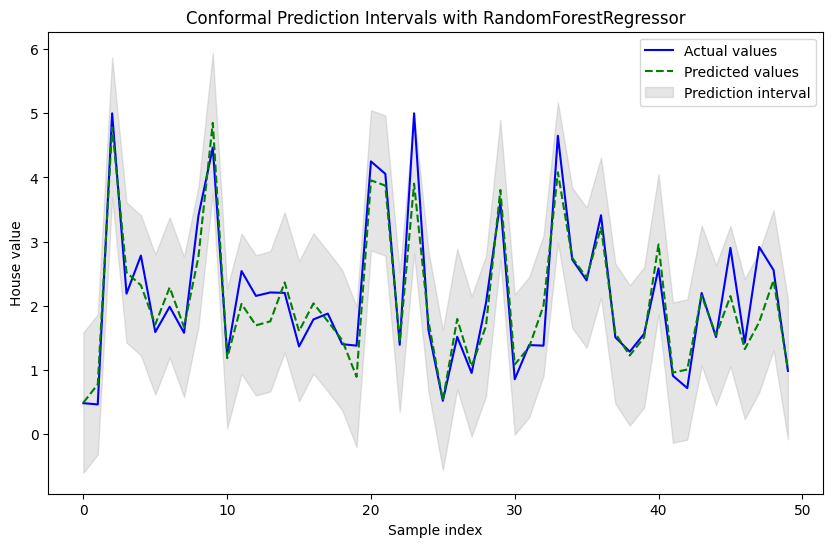

In [13]:
# Get predictions on the calibration set
y_cal_pred = model.predict(X_cal)

# Calculate nonconformity scores
nonconformity_scores = np.abs(y_cal - y_cal_pred)

def predict_with_conformal(X_test, model, nonconformity_scores, confidence=0.95):
    y_pred = model.predict(X_test)
    n = len(nonconformity_scores)
    q = np.quantile(nonconformity_scores, confidence)
    lower_bound = y_pred - q
    upper_bound = y_pred + q
    return y_pred, lower_bound, upper_bound

# Example prediction
X_test = X_cal[:50]  # Use some samples from the calibration set for testing
y_pred, lower_bound, upper_bound = predict_with_conformal(X_test, model, nonconformity_scores)

# Plot actual vs predicted with prediction intervals
plt.figure(figsize=(10, 6))
# Plot actual values
plt.plot(range(len(X_test)), y_cal[:50], label='Actual values', color='blue')
# Plot predicted values
plt.plot(range(len(X_test)), y_pred, label='Predicted values', color='green', linestyle='dashed')
# Fill between the prediction intervals
plt.fill_between(range(len(X_test)), lower_bound, upper_bound, color='grey', alpha=0.2, label='Prediction interval')
plt.xlabel('Sample index')
plt.ylabel('House value')
plt.title('Conformal Prediction Intervals with RandomForestRegressor')
plt.legend()
plt.show()